In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 2: Load dataset
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Step 3: check the data cleaning
print("Checking for missing values:")
print(df.isnull().sum())

print("\nChecking for duplicate rows:")
print(df.duplicated().sum())

print("\nDataset info:")
print(df.info())

print("\nStatistical summary:")
print(df.describe())

Checking for missing values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Checking for duplicate rows:
0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    objec

In [ ]:
# Step 4: Create binary classification target (pass or fail)
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)
df[['G3', 'pass_fail']].head()
df['G1'] = df['G1'].apply(lambda x: 1 if x >= 10 else 0)
df['G2'] = df['G2'].apply(lambda x: 1 if x >= 10 else 0)


In [ ]:
# Step 5: Splitting data into features and target
X = df.drop(['G3', 'pass_fail'], axis=1)
X = pd.get_dummies(X)
y = df['pass_fail']

In [ ]:
# Step 6: Split data into train (70%) and test (30%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now split 10% of training data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_valid.to_csv('X_valid.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

y_train.to_csv('y_train.csv', index=False)
y_valid.to_csv('y_valid.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [ ]:
# Step 7: Train initial decision tree before pruning
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Step 8: Evaluate model before pruning
y_pred = tree1.predict(X_test)
print('Confusion Matrix (before pruning):')
print(confusion_matrix(y_test, y_pred))
print("Classification Report (before pruning):")
print(classification_report(y_test, y_pred))

Confusion Matrix (before pruning):
[[42  4]
 [ 9 64]]
Classification Report (before pruning):
              precision    recall  f1-score   support

           0       0.82      0.91      0.87        46
           1       0.94      0.88      0.91        73

    accuracy                           0.89       119
   macro avg       0.88      0.89      0.89       119
weighted avg       0.90      0.89      0.89       119



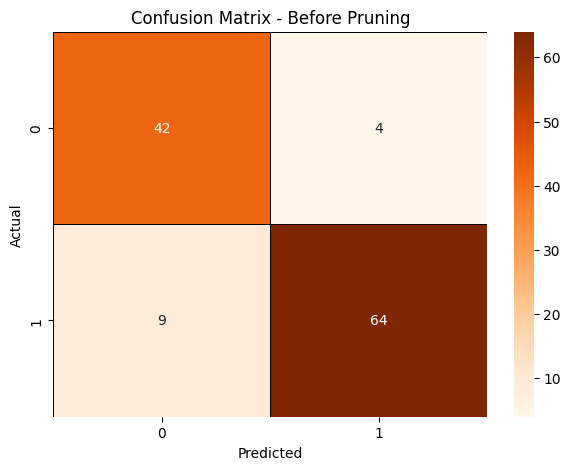

In [ ]:
# Step 9: Heatmap before pruning
conf_matrix_before = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Before Pruning')
plt.show()

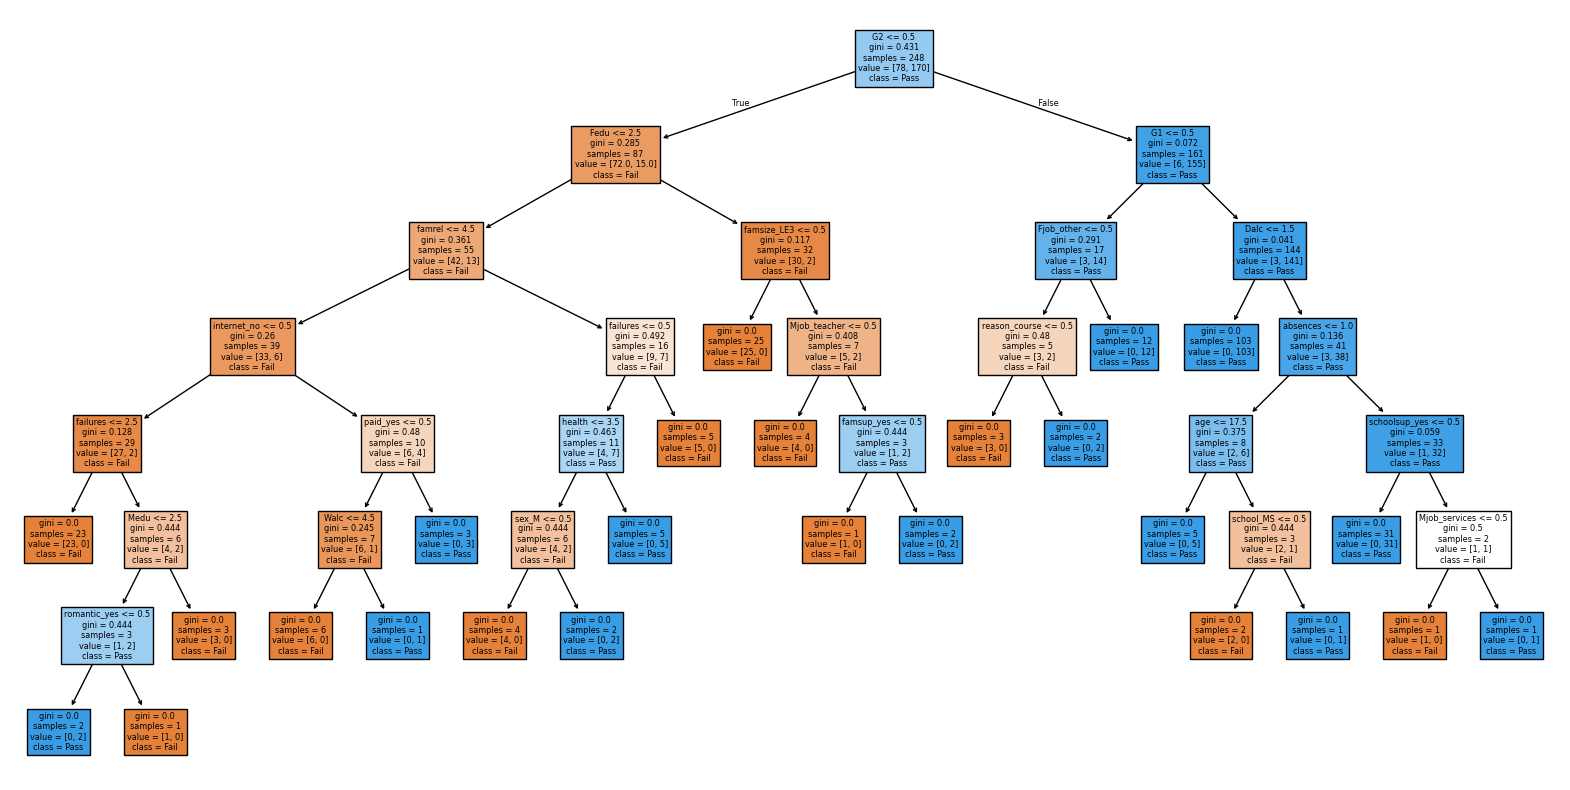

In [ ]:
# Step 10: Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(tree1, filled=True, feature_names=X.columns, class_names=['Fail', 'Pass'])
plt.show()

In [ ]:
# Step 11: Train pruned tree (limit depth)
tree2 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
# Step 12: Evaluate after pruning
y_pred2 = tree2.predict(X_test)
print('Confusion Matrix (after pruning):')
print(confusion_matrix(y_test, y_pred2))
print("Classification Report (after pruning):")
print(classification_report(y_test, y_pred2))

Confusion Matrix (after pruning):
[[45  1]
 [10 63]]
Classification Report (after pruning):
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        46
           1       0.98      0.86      0.92        73

    accuracy                           0.91       119
   macro avg       0.90      0.92      0.91       119
weighted avg       0.92      0.91      0.91       119



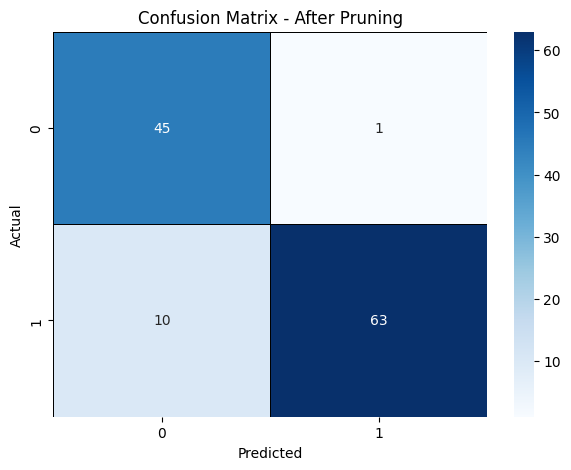

In [ ]:
# Step 13: Heatmap after pruning
conf_matrix_after = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_after, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - After Pruning')
plt.show()

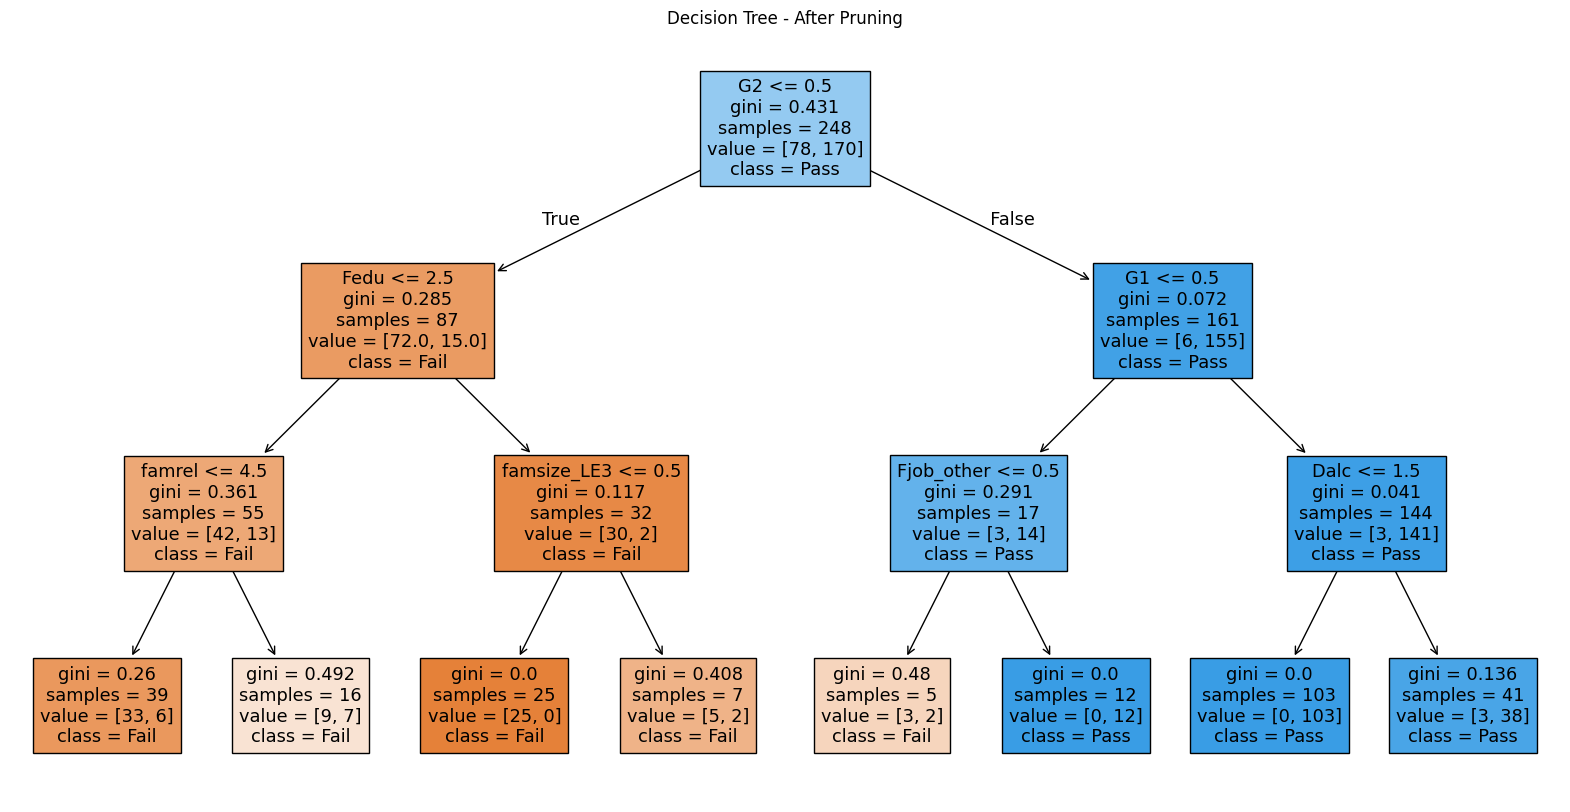

In [ ]:
# Step 14: Visualize Decision Tree after pruning
plt.figure(figsize=(20,10))
plot_tree(tree2, filled=True, feature_names=X.columns, class_names=['Fail', 'Pass'])
plt.title('Decision Tree - After Pruning')
plt.show()

In [ ]:
y_train.values.ravel()
y_valid.values.ravel()
y_test.values.ravel()

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
# Train SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [ ]:
# Evaluation and print results
print("=== KNN Evaluation ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

=== KNN Evaluation ===
[[17 29]
 [ 4 69]]
              precision    recall  f1-score   support

           0       0.81      0.37      0.51        46
           1       0.70      0.95      0.81        73

    accuracy                           0.72       119
   macro avg       0.76      0.66      0.66       119
weighted avg       0.74      0.72      0.69       119



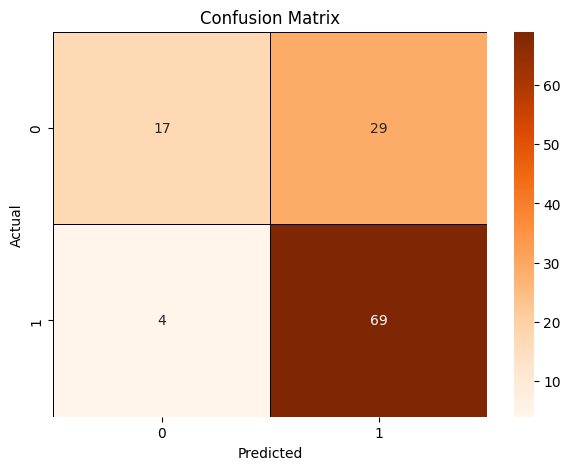

In [ ]:
conf_matrix_before = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\n=== SVM Evaluation ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


=== SVM Evaluation ===
[[40  6]
 [ 8 65]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        46
           1       0.92      0.89      0.90        73

    accuracy                           0.88       119
   macro avg       0.87      0.88      0.88       119
weighted avg       0.88      0.88      0.88       119



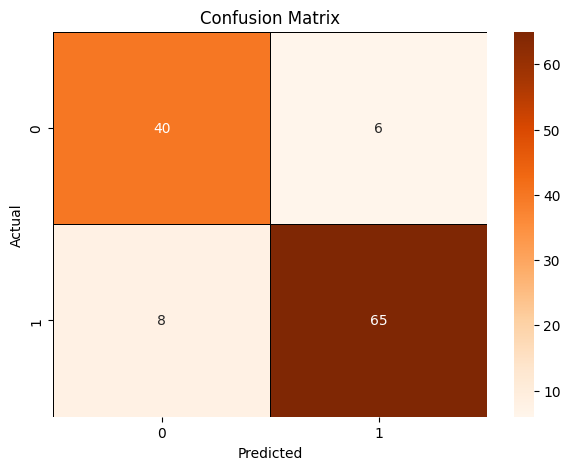

In [ ]:
conf_matrix_before = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Oranges', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()